In [1]:
import glob
import sys

In [2]:
sys.executable

'c:\\anaconda3\\envs\\test\\python.exe'

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [8]:
get_available_gpus()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8138130141649694865, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1489587404
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7068750757361210374
 physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [5]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")    

Default GPU Device: /device:GPU:0


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation
from keras import losses, optimizers, regularizers

Using TensorFlow backend.


In [7]:
from keras.backend.tensorflow_backend import set_session
#config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.2
#set_session(tf.Session(config=config))

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
%matplotlib inline
fig = plt.figure()

In [10]:
X_train_data, X_label = [], []
for image_class, dir_ in enumerate(['red', 'yellow', 'green', 'none']):
    for idx, img_name in enumerate(glob.glob('{}/*.jpg'.format(dir_))):
        file = cv2.imread(img_name)
        # convert from BGR to RGB
        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
        # resize image
        file_resized = cv2.resize(file, (32,64))
        # normalize
        X_train_data.append(file_resized/255.)
        X_label.append(image_class)

X_train_data = np.array(X_train_data)
X_label = np.array(X_label)

In [11]:
len(X_train_data)

367

In [14]:
from keras.utils.np_utils import to_categorical
# One-hot encode the labels
X_label_onehot = to_categorical(X_label) 

In [15]:
X_label_onehot

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]], dtype=float32)

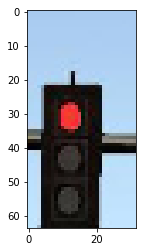

In [16]:
plt.imshow(X_train_data[1])

In [17]:
# Split into train and test set
sep_val = round(len(X_label)*0.9)
print(len(X_label))
print(sep_val)
print(len(X_label_onehot))

367
330
367


In [34]:
#shuffle
from sklearn.utils import shuffle
test = [5,4,4,5,5,5,4]
test2 = [1,0,0,1,1,1,0]
test, test2 = shuffle(test, test2)
print(test, test2)

[4, 5, 5, 4, 4, 5, 5] [0, 1, 1, 0, 0, 1, 1]


In [35]:
X_train_data, X_label_onehot = shuffle(X_train_data, X_label_onehot)

In [37]:
X_label_onehot

array([[ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.]], dtype=float32)

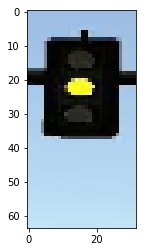

In [40]:
plt.imshow(X_train_data[2])

In [41]:
X_train = X_train_data[:sep_val]
X_test = X_train_data[sep_val+1:]
Y_train = X_label_onehot[:sep_val]
Y_test = X_label_onehot[sep_val+1:]
print(len(X_train), len(X_test), len(Y_train), len(Y_test))

330 36 330 36


In [42]:
kernel_size = (3, 3)

In [88]:
# Build the model
num_classes = 4
model = Sequential()
model.add(Conv2D(32, kernel_size, input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.6)
model.add(Conv2D(64, kernel_size, padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.6)
model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))

In [89]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [90]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [91]:
tl_classifier = model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.05, shuffle=True)

Train on 313 samples, validate on 17 samples
Epoch 1/20
 - 2s - loss: 4.9829 - acc: 0.3131 - val_loss: 3.8319 - val_acc: 0.2941
Epoch 2/20
 - 0s - loss: 3.1990 - acc: 0.3450 - val_loss: 2.5005 - val_acc: 0.4118
Epoch 3/20
 - 0s - loss: 2.1655 - acc: 0.4409 - val_loss: 1.7586 - val_acc: 0.4118
Epoch 4/20
 - 0s - loss: 1.5732 - acc: 0.5240 - val_loss: 1.2081 - val_acc: 0.7647
Epoch 5/20
 - 0s - loss: 1.2734 - acc: 0.6198 - val_loss: 0.9299 - val_acc: 0.7647
Epoch 6/20
 - 0s - loss: 1.0602 - acc: 0.7157 - val_loss: 0.8626 - val_acc: 0.7647
Epoch 7/20
 - 0s - loss: 0.9409 - acc: 0.7476 - val_loss: 0.7656 - val_acc: 0.7647
Epoch 8/20
 - 0s - loss: 0.8092 - acc: 0.7987 - val_loss: 0.6757 - val_acc: 0.8824
Epoch 9/20
 - 0s - loss: 0.7466 - acc: 0.8339 - val_loss: 0.6632 - val_acc: 0.8235
Epoch 10/20
 - 0s - loss: 0.6717 - acc: 0.8466 - val_loss: 0.6316 - val_acc: 0.8235
Epoch 11/20
 - 0s - loss: 0.6076 - acc: 0.9137 - val_loss: 0.5937 - val_acc: 0.8824
Epoch 12/20
 - 0s - loss: 0.5683 - acc: 

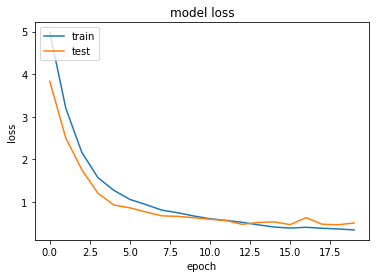

In [92]:
# summarize history for loss
plt.plot(tl_classifier.history['loss'])
plt.plot(tl_classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
prediction = model.predict(X_test, verbose=1)
counter = 0
counter_corr = 0
for i in range(len(prediction)):
    counter += 1
    #print (i, prediction[i], Y_test[i])
    if (np.argmax(prediction[i]) == np.argmax(Y_test[i])):
        counter_corr += 1
print('Test data set: Correct predictions: {} out of {}'.format(counter_corr, counter))
        
    

36/36 [==============================] - 0s 7ms/step
Test data set: Correct predictions: 34 out of 36


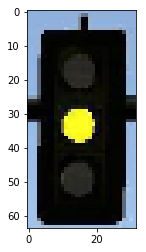

In [94]:
plt.imshow(X_test[1])

In [95]:
score = model.evaluate(X_test, Y_test, verbose=2)

In [96]:
print(score)

[0.40079617500305176, 0.94444444444444442]
